# Sprint ゲート付きリカレントニューラルネットワーク

## 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。



In [2]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.datasets import imdb

Using TensorFlow backend.


#### SimpleRNN

In [4]:
from keras.layers.recurrent import SimpleRNN

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 32s 1ms/step - loss: 0.6879 - accuracy: 0.5406 - val_loss: 0.6590 - val_accuracy: 0.5840
Epoch 2/15
25000/25000 [==============================] - 32s 1ms/step - loss: 0.5554 - accuracy: 0.7115 - val_loss: 0.5913 - val_accuracy: 0.6723
Epoch 3/15
25000/25000 [==============================] - 31s 1ms/step - loss: 0.4771 - accuracy: 0.7795 - val_loss: 0.5163 - val_accuracy: 0.7482
Epoch 4/15
25000/25000 [==============================] - 33s 1ms/step - loss: 0.4419 - accuracy: 0.8028 - val_loss: 0.5018 - val_accuracy: 0.7616
Epoch 5/15
25000/25000 [==============================] - 31s 1ms/step - loss: 0.4156 - accuracy: 0.8202 - val_loss: 0.5336 - val_accuracy: 0.7557
Epoch 6/15
25000/25000 [==============================] - 31s 1ms/step - loss: 0.4024 - accuracy: 0.8294 - val_loss: 0.5087 - val_accuracy: 0.7681
Epoch 7/15
25000/25000 [==============================] - 31s 1ms/st

#### GNU

In [5]:
from keras.layers.recurrent import GRU

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 91s 4ms/step - loss: 0.5390 - accuracy: 0.7314 - val_loss: 0.5266 - val_accuracy: 0.7405
Epoch 2/15
25000/25000 [==============================] - 89s 4ms/step - loss: 0.3375 - accuracy: 0.8607 - val_loss: 0.5071 - val_accuracy: 0.7474
Epoch 3/15
25000/25000 [==============================] - 91s 4ms/step - loss: 0.7767 - accuracy: 0.7919 - val_loss: 0.5793 - val_accuracy: 0.6958
Epoch 4/15
25000/25000 [==============================] - 88s 4ms/step - loss: 27.4362 - accuracy: 0.7563 - val_loss: 0.6109 - val_accuracy: 0.6750
Epoch 5/15
25000/25000 [==============================] - 88s 4ms/step - loss: 0.7804 - accuracy: 0.8308 - val_loss: 0.6259 - val_accuracy: 0.6801
Epoch 6/15
25000/25000 [==============================] - 88s 4ms/step - loss: 0.4224 - accuracy: 0.8334 - val_loss: 0.6461 - val_accuracy: 0.6750
Epoch 7/15
25000/25000 [==============================] - 90s 4ms/s

LSTM

In [3]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 84s 3ms/step - loss: 0.4529 - accuracy: 0.7859 - val_loss: 0.3701 - val_accuracy: 0.8397
Epoch 2/15
25000/25000 [==============================] - 83s 3ms/step - loss: 0.3043 - accuracy: 0.8759 - val_loss: 0.3913 - val_accuracy: 0.8240
Epoch 3/15
25000/25000 [==============================] - 83s 3ms/step - loss: 0.2186 - accuracy: 0.9147 - val_loss: 0.4068 - val_accuracy: 0.8289
Epoch 4/15
25000/25000 [==============================] - 82s 3ms/step - loss: 0.1561 - accuracy: 0.9407 - val_loss: 0.5214 - val_accuracy: 0.8269
Epoch 5/15
25000/25000 [==============================] - 84s 3ms/step - loss: 0.1110 - accuracy: 0.9602 - val_loss: 0.5356 - val_accuracy: 0.8198
Epoch 6/15
25000/25000 [==============================] - 83s 3ms/step - loss: 0.0776 - accuracy: 0.9727 - val_loss: 0.6433 - val_accuracy: 0.8213
Epoch 7/15
25000/25000 [==============================] - 83s 3ms/st

### ConvLSTM2D

Train on 950 samples, validate on 50 samples
Epoch 1/2
950/950 [==============================] - 368s 388ms/step - loss: 0.2721 - val_loss: 0.4526
Epoch 2/2
950/950 [==============================] - 371s 391ms/step - loss: 0.0230 - val_loss: 0.3226


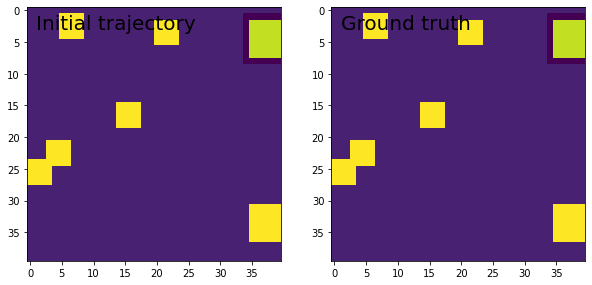

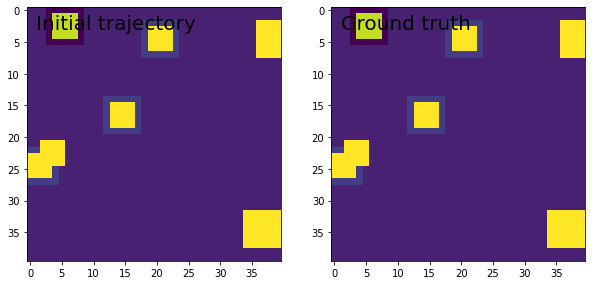

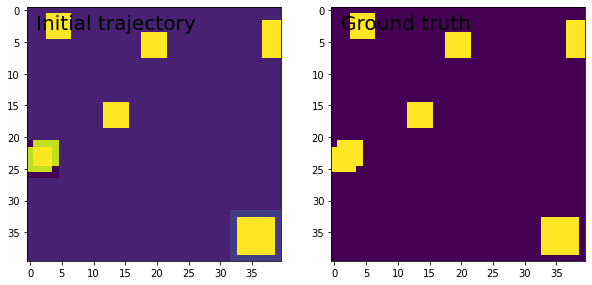

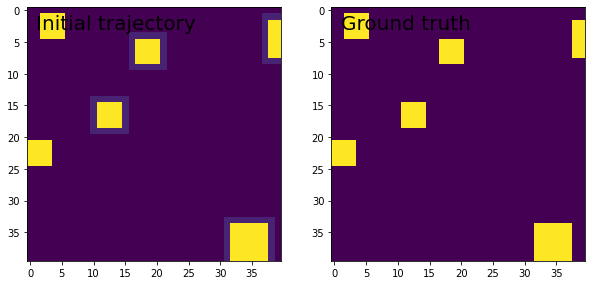

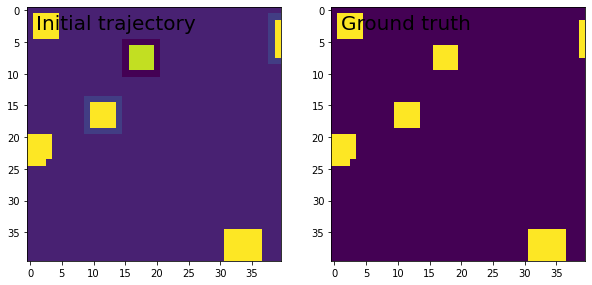

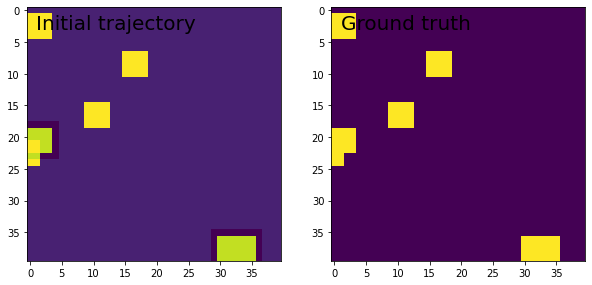

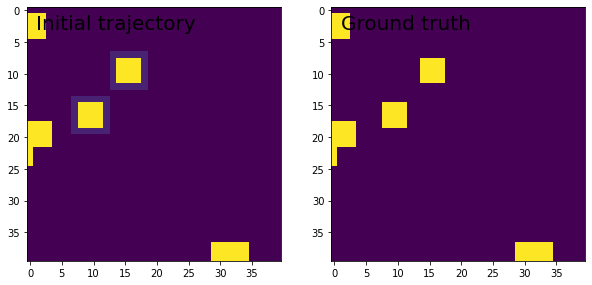

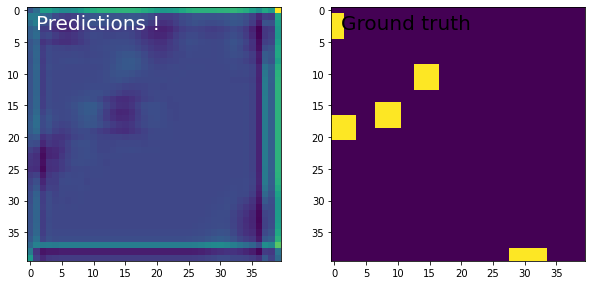

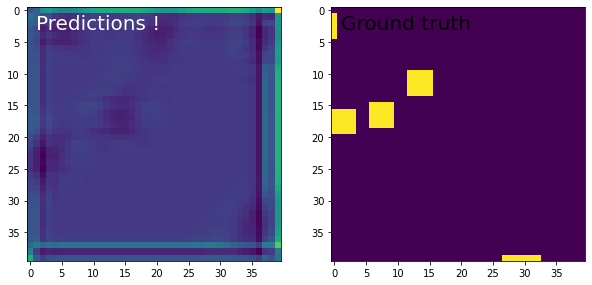

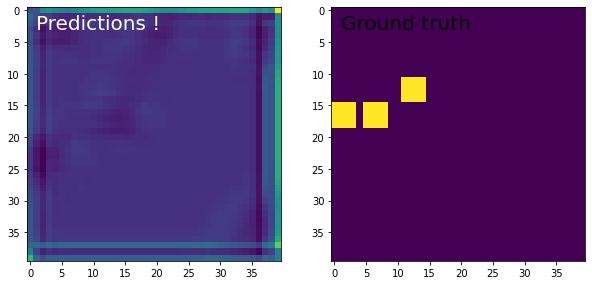

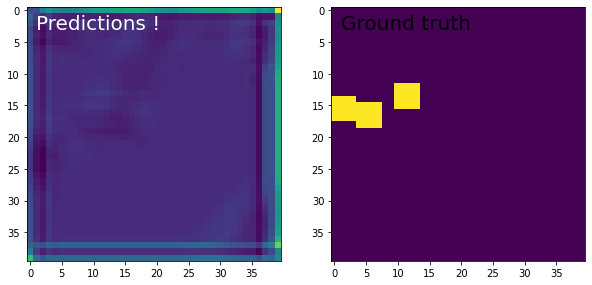

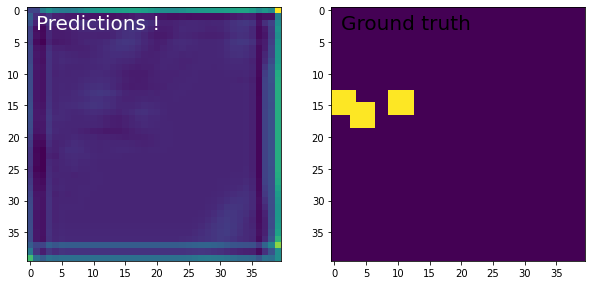

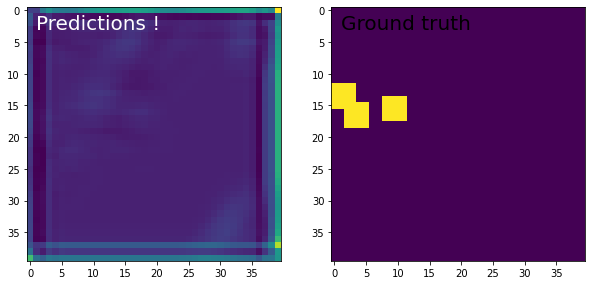

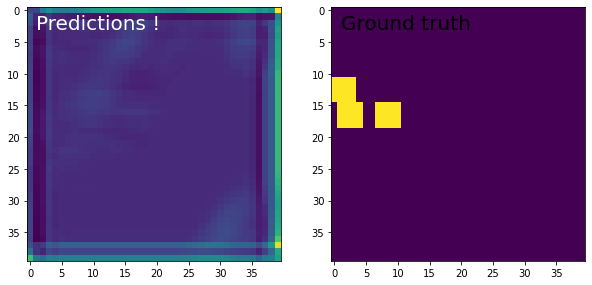

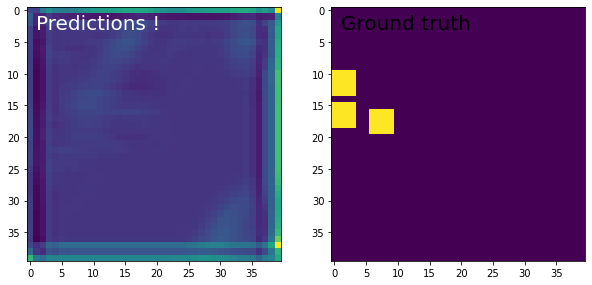

In [6]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=2, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## 【問題3】他のクラスの説明

ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

- RNN
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

#### RNN
Recurrentレイヤーに対する基底クラス。隠れ層の状態を保持する。

#### SimpleRNNCell
出力が入力にフィードバックされる全結合RNN。

#### GRUCell
ゲート付きリカレントユニットのセルクラス。

#### LSTMCell
LSTM層のためのセルクラス。

#### StackedRNNCells
RNNセルのスタックの振る舞いを単一のセルのようにするためのラッパー。

#### CuDNNGRU
CuDNNを利用した高速なGRU実装。GPU上のみで動作。

#### CuDNNLSTM
CuDNNを利用した高速なLSTM実装。GPU上のみで動作。